In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [5]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
sample.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [8]:
print('Shape of train: {}'.format(train.shape))
print('Shape of test: {}'.format(test.shape))

Shape of train: (381109, 12)
Shape of test: (127037, 11)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
dataDesc = []

for i in train.columns:
    dataDesc.append([
        i,
        train[i].dtypes,
        train[i].isnull().sum(),
        round((((train[i].isnull().sum()) / (len(train))) * 100), 2),
        train[i].nunique(),
        train[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[53259, 147572]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[59, 67]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[17.0, 28.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[52938.0, 28935.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[78.0, 31.0]"


# Data Dictionary

id:	Unique ID for the customer

Gender:	Gender of the customer

Age: Age of the customer

Driving_License: 	0 : Customer does not have DL, 1 : Customer already has DL

Region_Code:	Unique code for the region of the customer

Previously_Insured: 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age: 	Age of the Vehicle 

Vehicle_Damage: 
1 : Customer got his/her vehicle damaged in the past.
0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year

Policy_Sales_Channel:	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage:	Number of Days, Customer has been associated with the company

Response:	1 :  Customer is interested, 0 : Customer is not interested

# Handling Missing Values

In [11]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values

# Exploratory Data Analysis

In [12]:
### Checking Target Variable Bias
target = train['Response'].value_counts()
target

0    334399
1     46710
Name: Response, dtype: int64

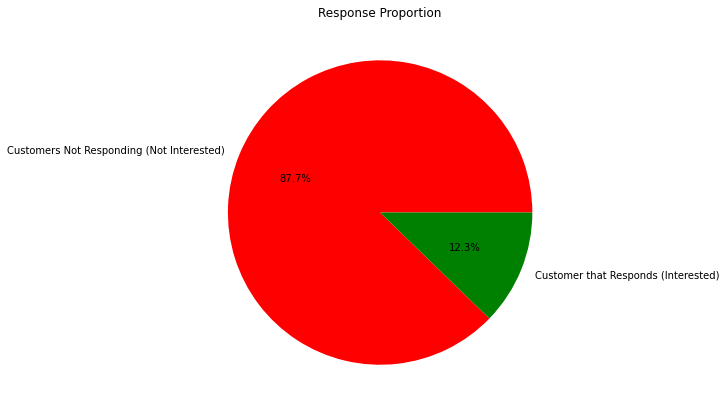

In [13]:
plt.figure(figsize=(7,7))
plt.title('Response Proportion')
plt.pie(target, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

Data is imbalanced only 12,3% is likely to response (buy the insurance)

# Analysing Each Variable's Relationship with Target Variable

### 1. Gender

In [14]:
result_gender1 = pd.crosstab(index=train['Gender'], columns=train['Response'], margins=True)
result_gender1

Response,0,1,All
Gender,,,
Female,156835,18185,175020
Male,177564,28525,206089
All,334399,46710,381109


In [15]:
result_gender2 = (pd.crosstab(index=train['Gender'], columns=train['Response'], normalize='index', margins=True) *100).round(2)
result_gender2

Response,0,1
Gender,,
Female,89.61,10.39
Male,86.16,13.84
All,87.74,12.26


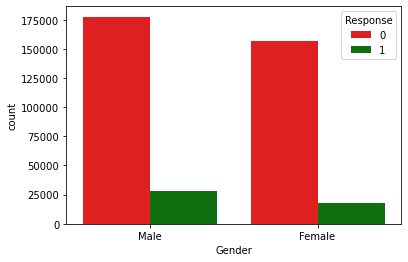

In [16]:
sns.countplot(train['Gender'], hue = train['Response'],palette=['Red','Green'])
plt.show()

### 2. Age

In [17]:
train['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Boxplot')

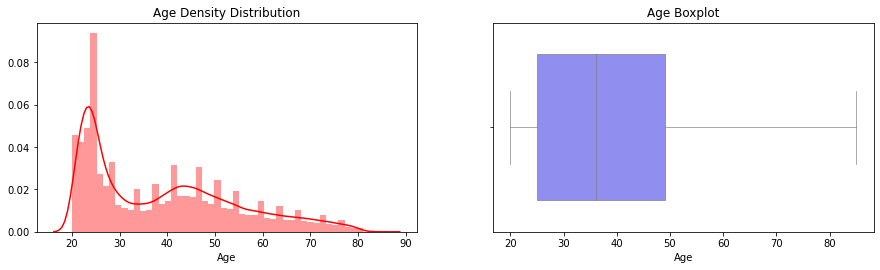

In [18]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['Age'], color = 'r')
plt.title('Age Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['Age'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Age Boxplot')

### Analysing Response for different Age-Groups

In [19]:
# First we bin the age group
coba = np.linspace(min(train['Age']), max(train['Age']),7)
coba

array([20.        , 30.83333333, 41.66666667, 52.5       , 63.33333333,
       74.16666667, 85.        ])

In [20]:
#add a new Age Group Column
bins = [10,30,40,50,60,85]
group_name = ['age_grp_20_to_30','age_grp_31_to_40','age_grp_41_to_50','age_grp_51_to_60', 'age_grp_old']
train['Age_Groups'] = pd.cut(train['Age'], bins, labels = group_name, include_lowest=True)

In [21]:
train[train['Age'] == 31] # To check wether the binning is accurate

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Groups
107,108,Male,31,1,29.0,0,1-2 Year,Yes,28867.0,124.0,247,0,age_grp_31_to_40
159,160,Female,31,1,15.0,1,< 1 Year,No,25908.0,152.0,84,0,age_grp_31_to_40
163,164,Female,31,1,28.0,1,1-2 Year,No,29395.0,26.0,123,0,age_grp_31_to_40
348,349,Female,31,1,28.0,0,1-2 Year,Yes,39423.0,124.0,190,0,age_grp_31_to_40
366,367,Male,31,1,24.0,0,1-2 Year,Yes,2630.0,156.0,257,0,age_grp_31_to_40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380741,380742,Male,31,1,28.0,0,1-2 Year,Yes,32882.0,156.0,31,0,age_grp_31_to_40
380760,380761,Female,31,1,28.0,1,1-2 Year,No,34871.0,26.0,69,0,age_grp_31_to_40
380869,380870,Female,31,1,41.0,0,< 1 Year,Yes,26028.0,124.0,43,1,age_grp_31_to_40
380902,380903,Male,31,1,21.0,1,< 1 Year,No,18317.0,152.0,51,0,age_grp_31_to_40


In [22]:
groups_of_age = train['Age_Groups'].unique()

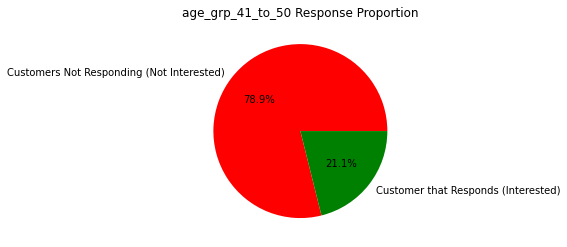

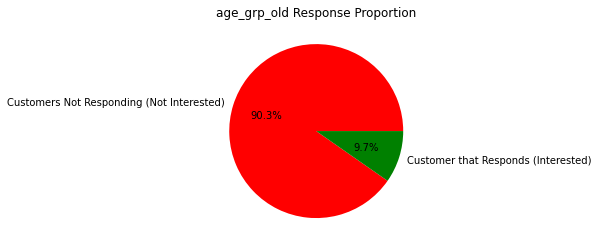

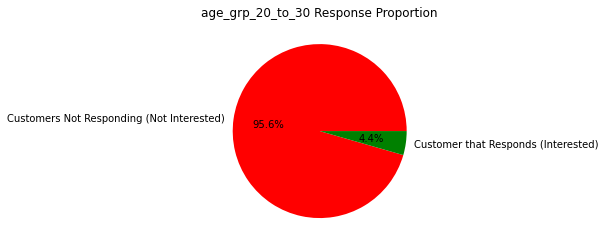

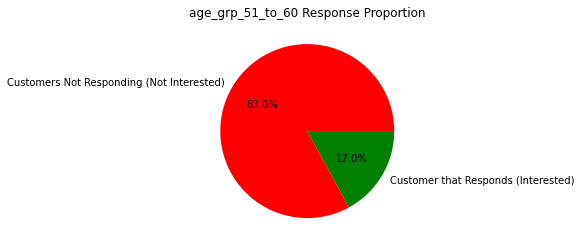

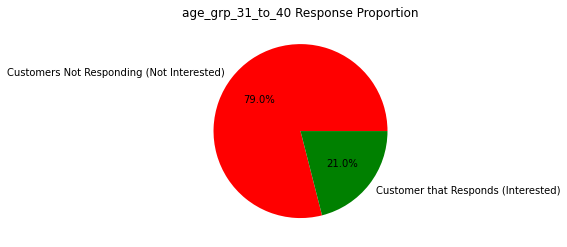

In [23]:
for i in range (len(groups_of_age)):
    test = train[train['Age_Groups'] == groups_of_age[i]]
    result_age_group1 = (pd.crosstab(index=test['Age_Groups'], columns=train['Response'], normalize='index') *100).round(2)
    result_age_group1
    plt.title(f'{groups_of_age[i]} Response Proportion')
    plt.pie(result_age_group1, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
    plt.show()


In [24]:
result_age_group = (pd.crosstab(index=train['Age_Groups'], columns=train['Response'], normalize='index', margins=True) *100).round(2)
result_age_group

Response,0,1
Age_Groups,,
age_grp_20_to_30,95.55,4.45
age_grp_31_to_40,78.98,21.02
age_grp_41_to_50,78.90,21.10
age_grp_51_to_60,82.97,17.03
age_grp_old,90.31,9.69
All,87.74,12.26


In [25]:
result_age_group_gender = train.groupby(by=[train['Age_Groups'], train['Gender'], train['Response']])['Response'].size().to_frame()
result_age_group_gender

Response
Age_Groups       Gender Response          
age_grp_20_to_30 Female 0            85938
                        1             3241
                 Male   0            68340
                        1             3942
age_grp_31_to_40 Female 0            19592
                        1             5007
                 Male   0            23974
                        1             6590
age_grp_41_to_50 Female 0            22822
                        1             6019
                 Male   0            37094
                        1            10006
age_grp_51_to_60 Female 0            12820
                        1             2363
                 Male   0            24769
                        1             5353
age_grp_old      Female 0            15663
                        1             1555
                 Male   0            23387
                        1             2634

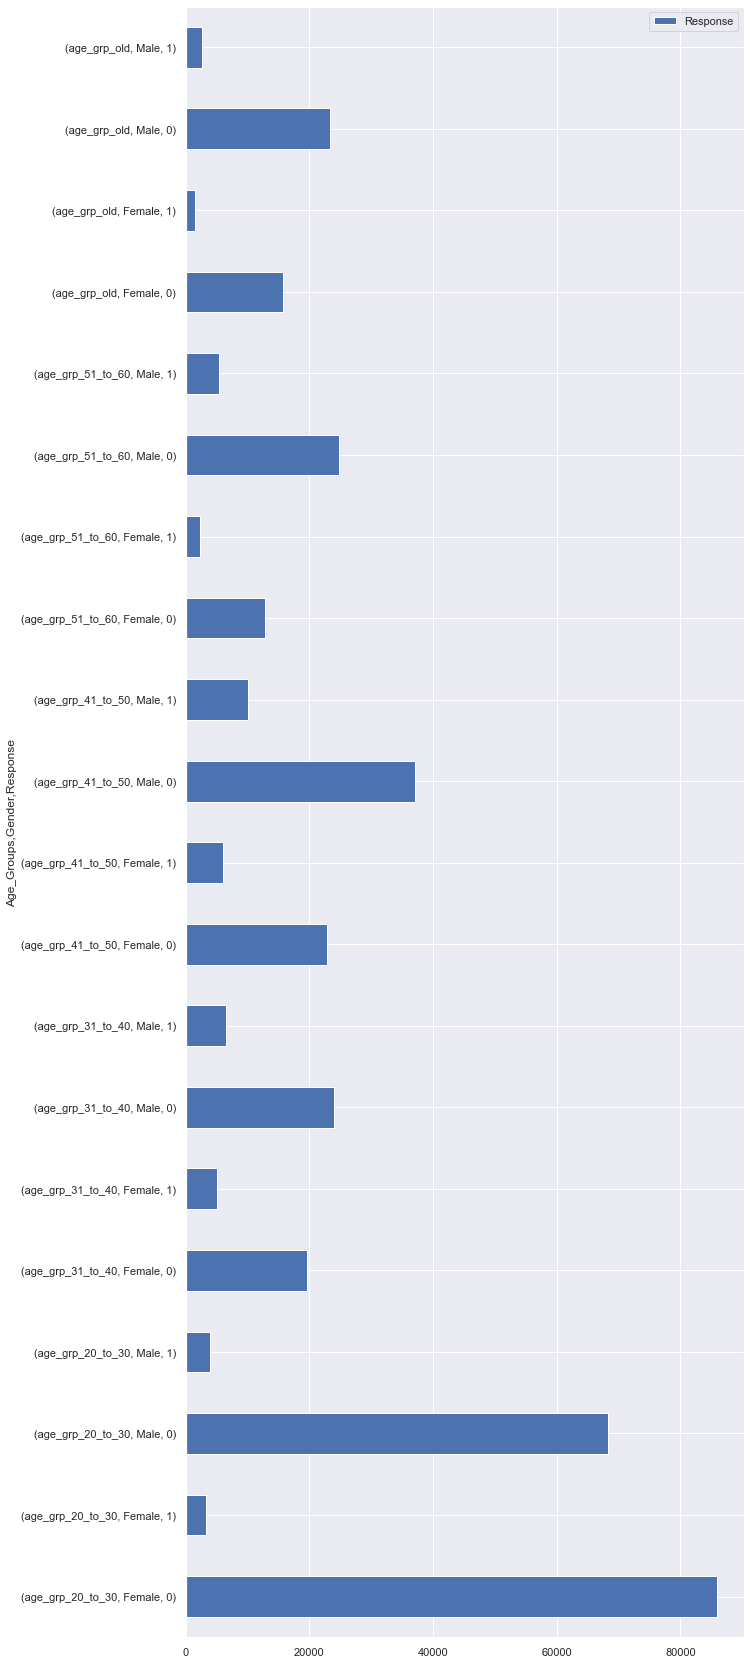

In [26]:
sns.set(rc={'figure.figsize':(10,30)})
bar_result_age_group_gender = result_age_group_gender.plot(kind='barh')

## Insights:

1. Customers of age between 30 to 60 are more likely to buy insurance.
2. Customes of age between 20 to 30 are less likely to buy insurance.
3. In almost every age group, 'Male's are more likely to buy insurance.

### 3. Driving License

In [27]:
driving_license = train['Driving_License'].value_counts()
driving_license

1    380297
0       812
Name: Driving_License, dtype: int64

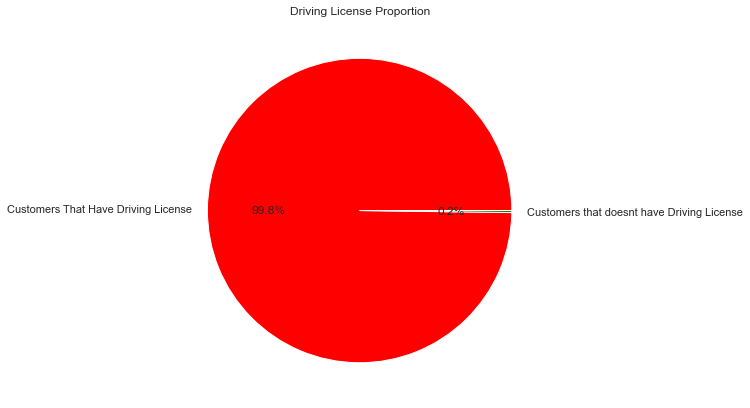

In [28]:
plt.figure(figsize=(7,7))
plt.title('Driving License Proportion')
plt.pie(driving_license, labels = ['Customers That Have Driving License', 'Customers that doesnt have Driving License'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

In [29]:
have_dl = train[train['Driving_License'] == 1]['Response'].value_counts()
have_dl

0    333628
1     46669
Name: Response, dtype: int64

In [30]:
dont_have_dl = train[train['Driving_License'] == 0]['Response'].value_counts()

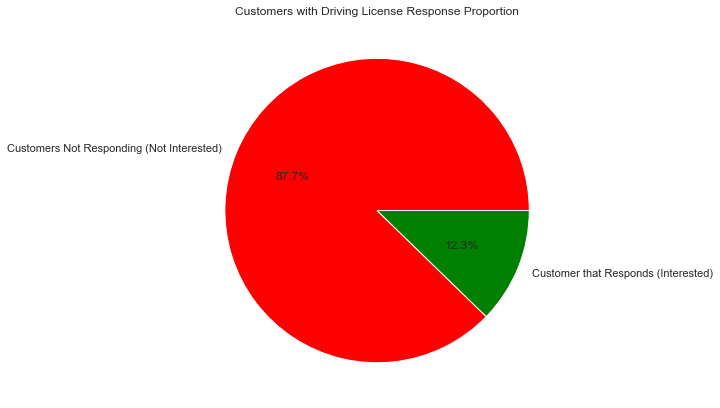

In [31]:
plt.figure(figsize=(7,7))
plt.title('Customers with Driving License Response Proportion')
plt.pie(have_dl, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

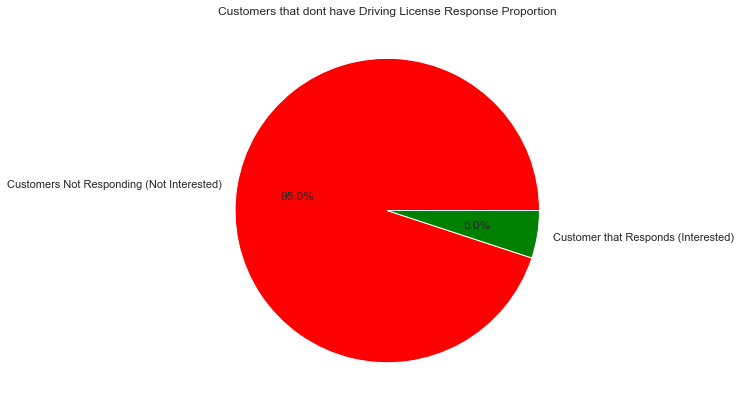

In [32]:
plt.figure(figsize=(7,7))
plt.title('Customers that dont have Driving License Response Proportion')
plt.pie(dont_have_dl, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

### Insights:

1. Almost every customer have driving license
2. Customers with Driving License have higher chance of buying Insurance (DUHHH)

## 4. Region_Code

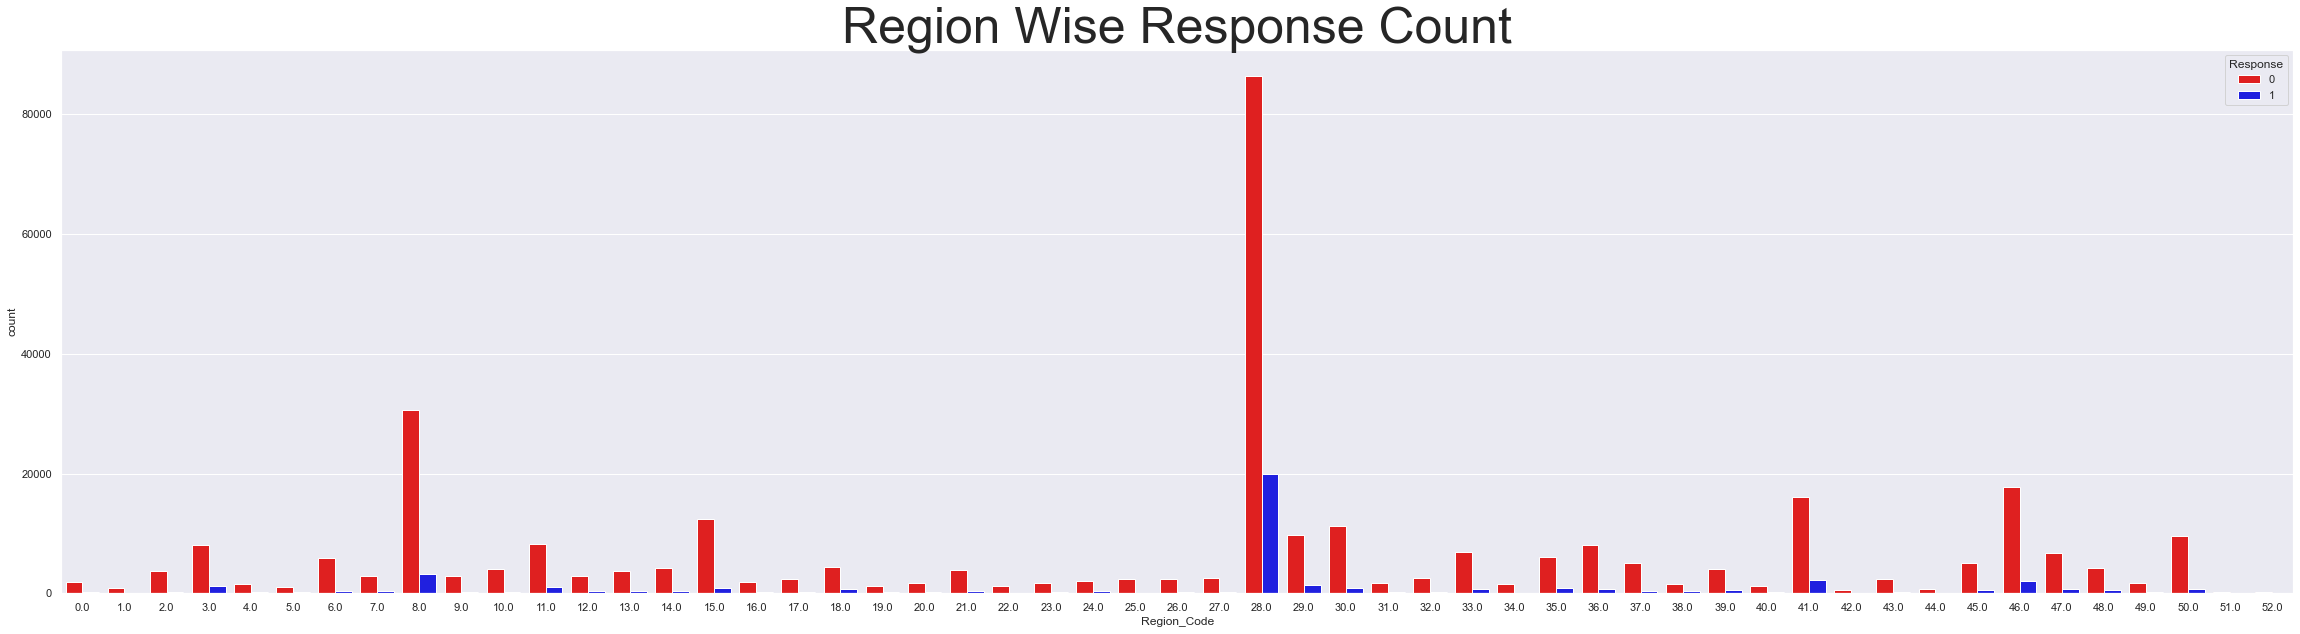

In [33]:
plt.figure(figsize = (40,10))
plt.title('Region Wise Response Count',fontsize=50)
sns.countplot(train['Region_Code'], hue = train['Response'],palette=['Red','Blue'])

In [34]:
result_region_code = train.groupby(by=[train['Region_Code'], train['Response']])['Response'].size().to_frame()
result_region_code

Response
Region_Code Response          
0.0         0             1847
            1              174
1.0         0              899
            1              109
2.0         0             3751
...                        ...
50.0        1              642
51.0        0              155
            1               28
52.0        0              234
            1               33

[106 rows x 1 columns]

Text(0, 0.5, 'Response from every Region Code')

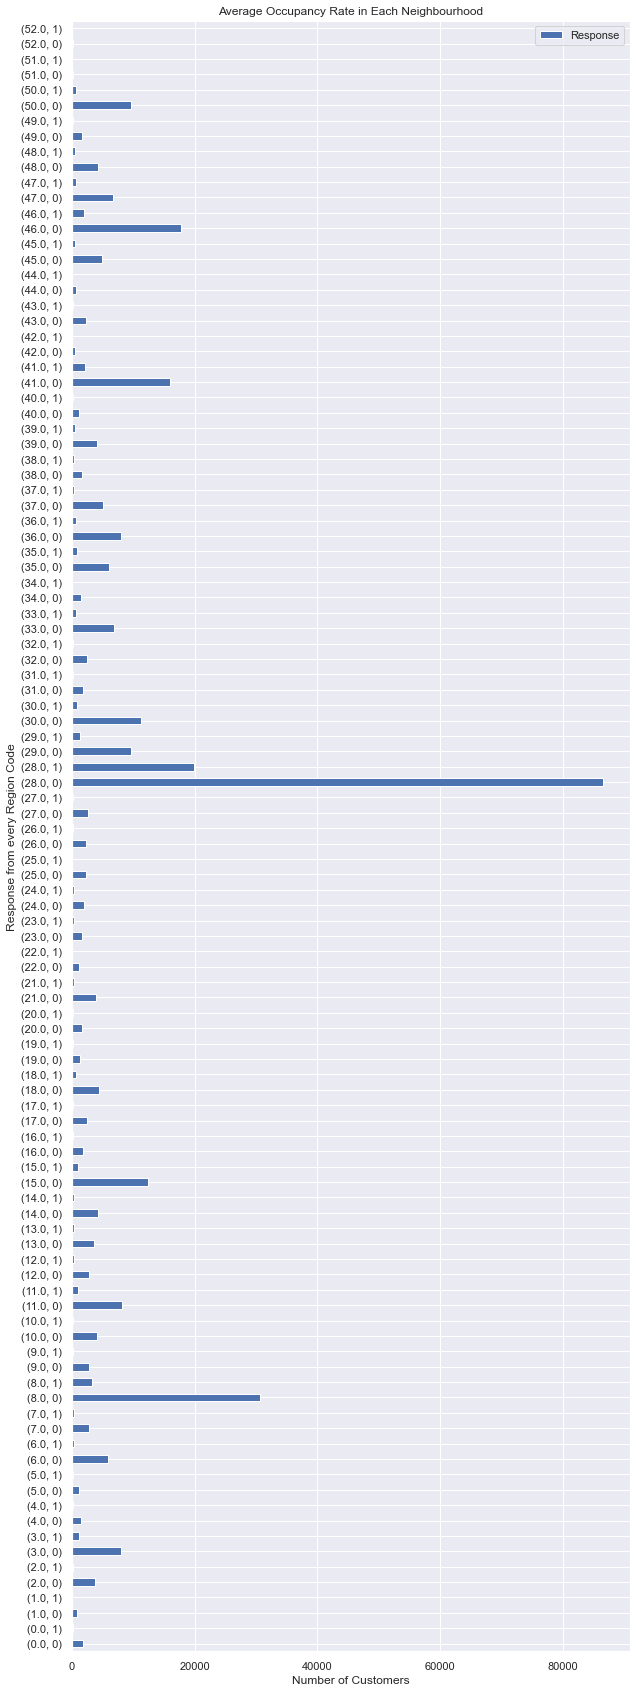

In [35]:
sns.set(rc={'figure.figsize':(10,30)})
bar_result_region_code = result_region_code.plot(kind='barh')
bar_result_region_code.set_title('Average Occupancy Rate in Each Neighbourhood')
bar_result_region_code.set_xlabel('Number of Customers')
bar_result_region_code.set_ylabel('Response from every Region Code')

### Insights:
1. The graph above shows the overall proportion of response from every Region Code The most are from Region 28
2.  We want to know in every Region how big is the Buying Percentage so we can decide the region with high buying percentage



In [36]:
### Visualizing Percentage of Response : 1 in all Region_Codes

In [37]:
u_region = train['Region_Code'].unique()
region_perc = {}
for i in u_region:
    total_region = train[ train['Region_Code'] == i].shape[0]
    buy_region = train[ (train['Region_Code'] == i) & train['Response'] == 1].shape[0]
    region_perc[i] = (buy_region/total_region)*100
    
region_perc = sorted(region_perc.items(), key=lambda x: x[1], reverse=True) # Sort the values base on the buying percentage


In [38]:
region_perc

[(38.0, 19.200394866732477),
 (28.0, 18.716346379739697),
 (19.0, 16.286644951140065),
 (4.0, 15.824541921154914),
 (23.0, 15.306122448979592),
 (51.0, 15.300546448087433),
 (24.0, 14.161490683229813),
 (7.0, 13.174748398902103),
 (18.0, 13.157384048127305),
 (3.0, 12.766187439195761),
 (35.0, 12.460386055891675),
 (39.0, 12.360034453057708),
 (52.0, 12.359550561797752),
 (29.0, 12.336195210122005),
 (41.0, 12.177626895909762),
 (40.0, 11.814671814671815),
 (5.0, 11.571540265832683),
 (20.0, 11.52454780361757),
 (11.0, 11.275996533795494),
 (45.0, 10.972346119536128),
 (1.0, 10.813492063492063),
 (46.0, 10.289128563471568),
 (48.0, 10.190130314035462),
 (31.0, 10.051020408163264),
 (33.0, 9.929448654298406),
 (12.0, 9.75609756097561),
 (8.0, 9.61419251999882),
 (43.0, 9.245926487305796),
 (14.0, 9.020949123557076),
 (13.0, 9.018830525272548),
 (47.0, 8.768154922001075),
 (0.0, 8.609599208312718),
 (32.0, 8.575529242913527),
 (9.0, 8.158658497258948),
 (36.0, 7.991360691144708),
 (37.0,

In [39]:
region_perc = list(zip(*region_perc)) #Make into a separate List
region = np.array(region_perc[0])
region_perc = np.array(region_perc[1])
region = pd.DataFrame(region)
region_perc = pd.DataFrame(region_perc)

region_res_perc = pd.concat((region,region_perc), axis=1) #combine the dataframe
region_res_perc.columns = ['Region_Code', 'Buy_Percentage']

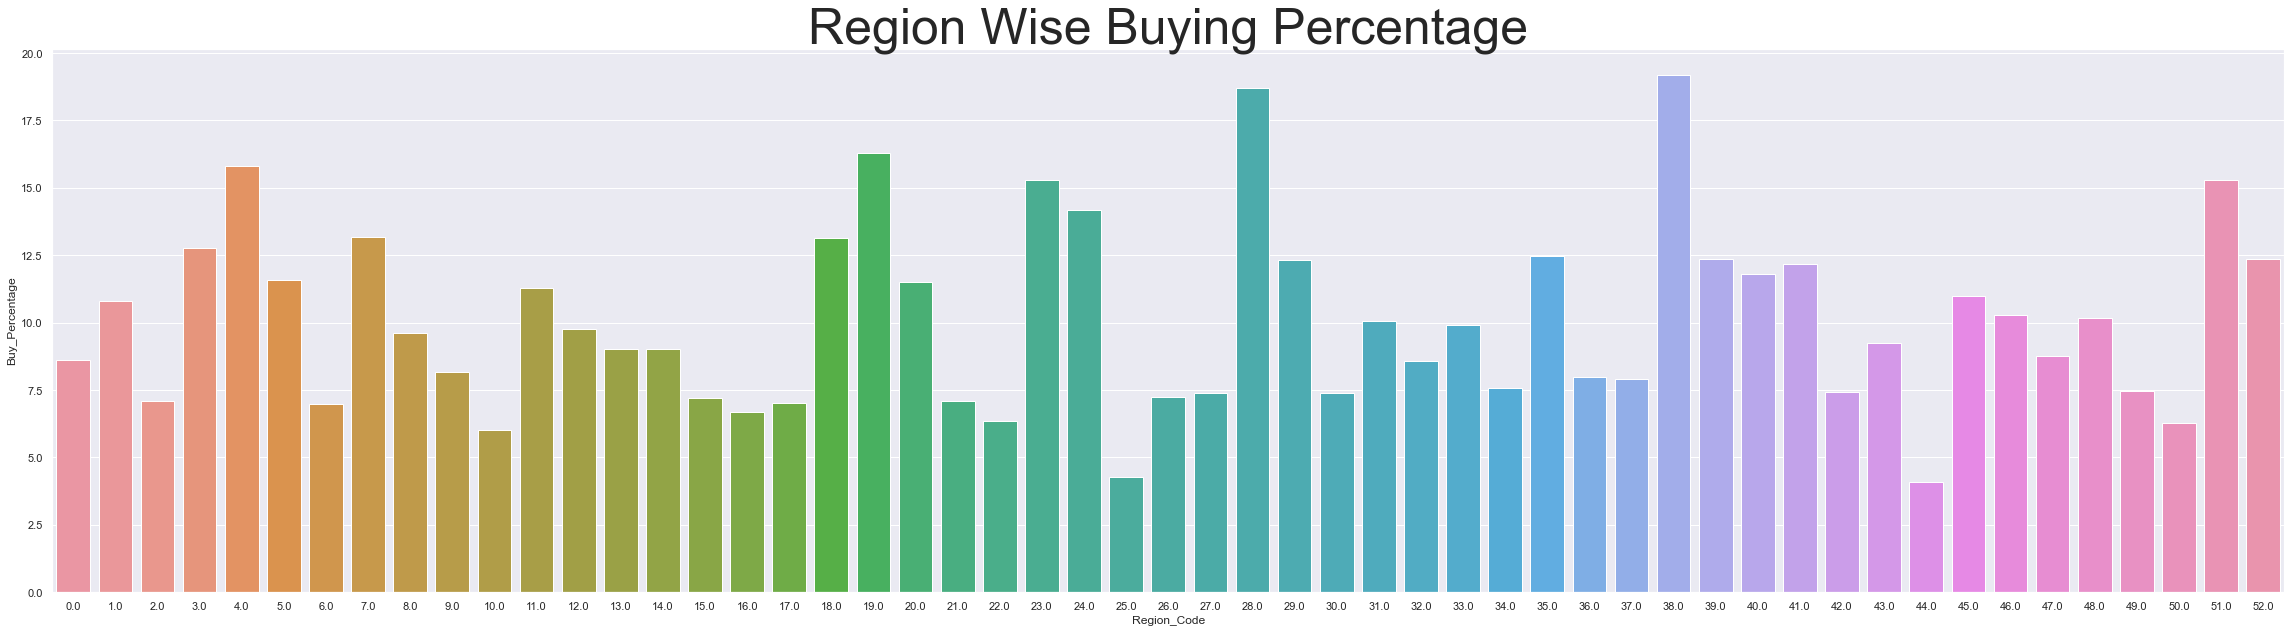

In [40]:
plt.figure(figsize=(40,10))
plt.title('Region Wise Buying Percentage',fontsize=50)
ax = sns.barplot(x = region_res_perc['Region_Code'], y = region_res_perc['Buy_Percentage'])

### Insights:

1. We have most of the customers from Region_Code : 28.
2. Top 5 Region Codes based the buying percentage : 38, 28, 19, 4, 23
3. Region_Codes 44 and 25 have the lowest percentage of buying insurance.

## 5. Previously_Insured

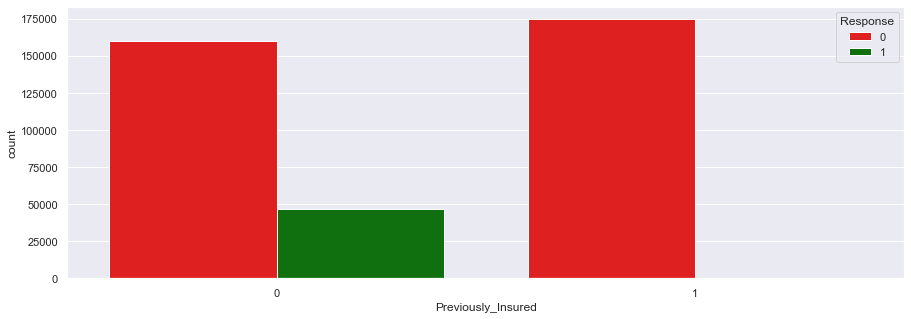

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(train['Previously_Insured'],hue=train['Response'],palette=['Red','Green'])

### Insights:

1. Customers who are Previously_Insured are very unlikely to buy Insurance now.
2. Customers who are not Previously_Insured have good chance of buying Insurance.

## 6. Vehicle_Age

In [42]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

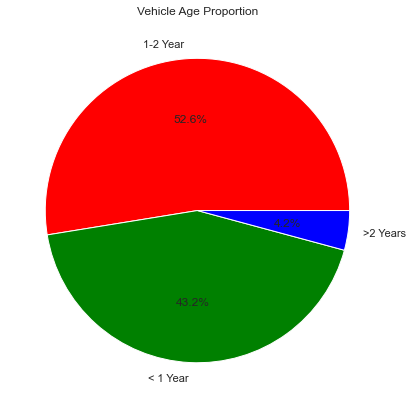

In [43]:
plt.figure(figsize=(7,7))
plt.title('Vehicle Age Proportion')
plt.pie(train['Vehicle_Age'].value_counts(), labels = ['1-2 Year', '< 1 Year', '>2 Years'], autopct = '%1.1f%%',colors=['Red','Green', 'Blue'])
plt.show()

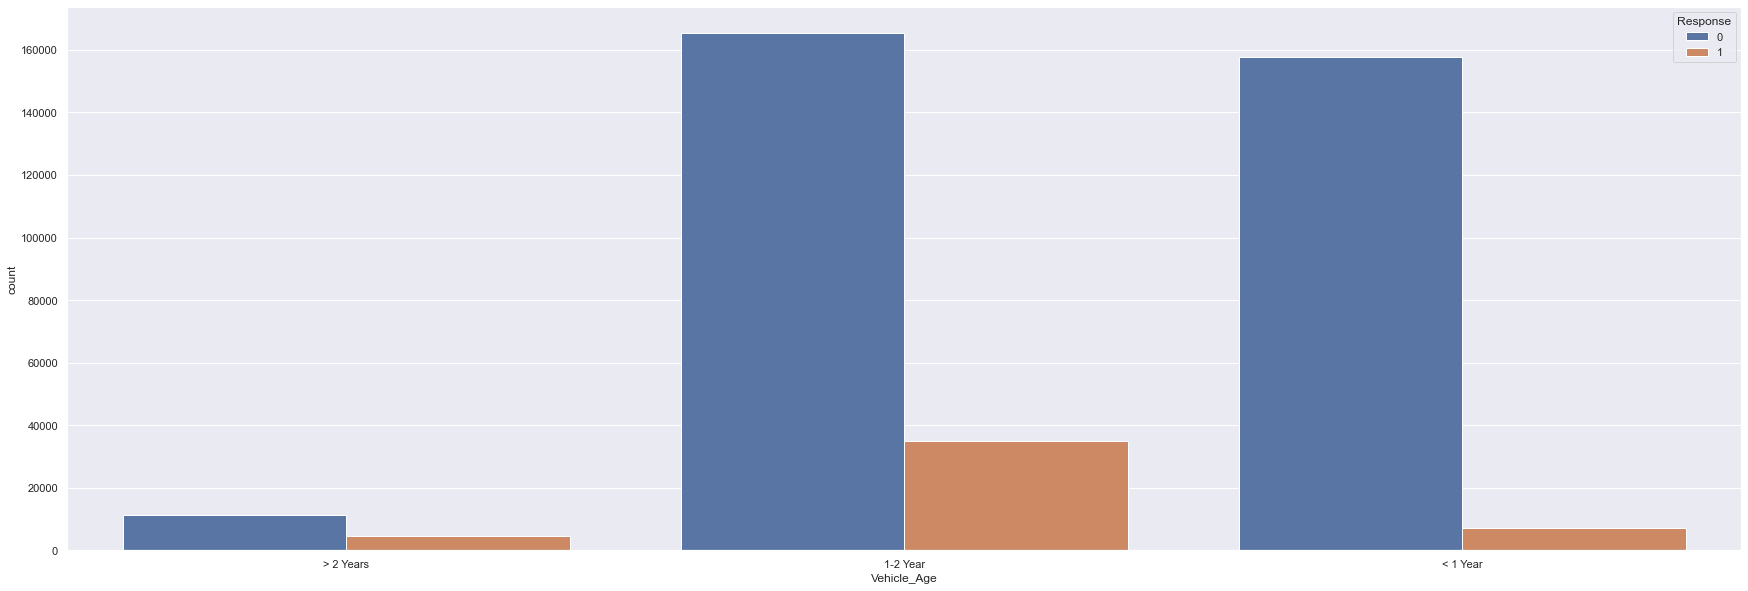

In [44]:
plt.figure(figsize = (30,10))
sns.countplot(train['Vehicle_Age'], hue = train['Response'])

In [45]:
result_vehicle_age = train.groupby(by=[train['Vehicle_Age'], train['Response']])['Response'].size().to_frame()
result_vehicle_age

Response
Vehicle_Age Response          
1-2 Year    0           165510
            1            34806
< 1 Year    0           157584
            1             7202
> 2 Years   0            11305
            1             4702

In [46]:
result_vehicle_age1 = (pd.crosstab(index=train['Vehicle_Age'], columns=train['Response'], normalize='index', margins=True) *100).round(2)
result_vehicle_age1

Response,0,1
Vehicle_Age,,
1-2 Year,82.62,17.38
< 1 Year,95.63,4.37
> 2 Years,70.63,29.37
All,87.74,12.26


In [47]:
va_below_1year = train[train['Vehicle_Age'] == '< 1 Year']['Response'].value_counts()
va_below_1year

0    157584
1      7202
Name: Response, dtype: int64

In [48]:
va_1_to_2year = train[train['Vehicle_Age'] == '1-2 Year']['Response'].value_counts()
va_1_to_2year

0    165510
1     34806
Name: Response, dtype: int64

In [49]:
va_above_2year = train[train['Vehicle_Age'] == '> 2 Years']['Response'].value_counts()
va_above_2year

0    11305
1     4702
Name: Response, dtype: int64

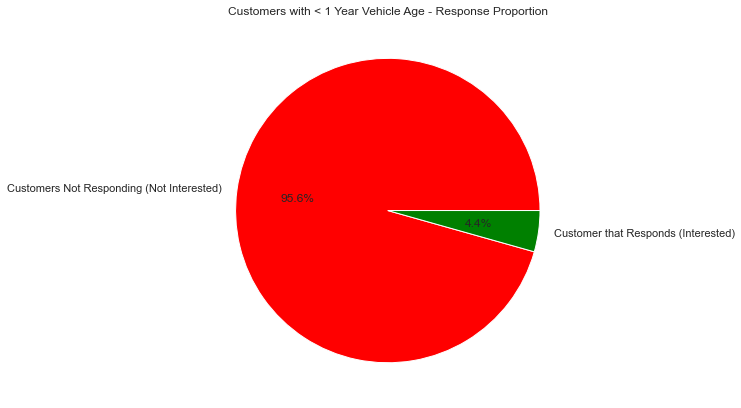

In [50]:
plt.figure(figsize=(7,7))
plt.title('Customers with < 1 Year Vehicle Age - Response Proportion')
plt.pie(va_below_1year, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

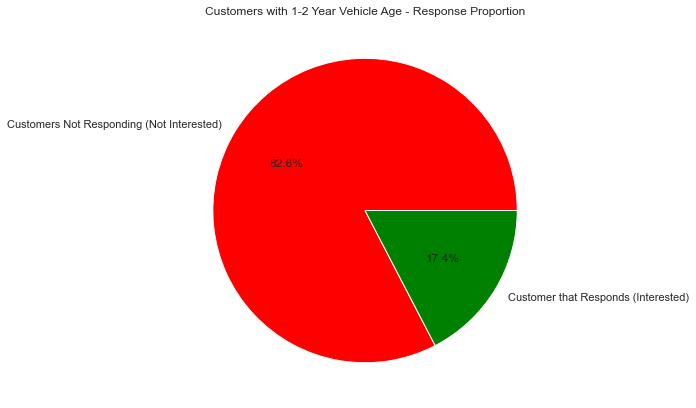

In [51]:
plt.figure(figsize=(7,7))
plt.title('Customers with 1-2 Year Vehicle Age - Response Proportion')
plt.pie(va_1_to_2year, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

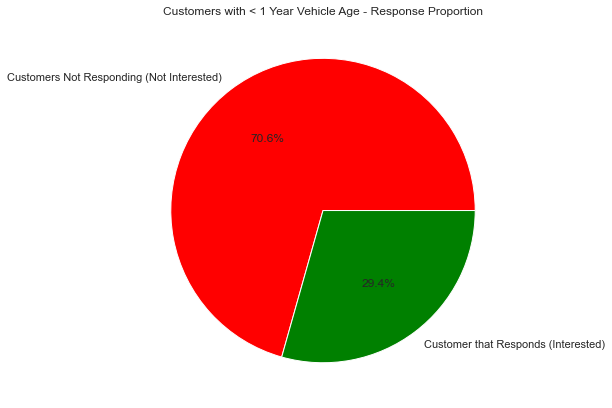

In [52]:
plt.figure(figsize=(7,7))
plt.title('Customers with < 1 Year Vehicle Age - Response Proportion')
plt.pie(va_above_2year, labels = ['Customers Not Responding (Not Interested)', 'Customer that Responds (Interested)'], autopct = '%1.1f%%',colors=['Red','Green'])
plt.show()

### Insights :

1. Most of our customers (52.6%) have Vehicle_Age `1-2 years`.
2. We have very few customers (4.2%) with Vehicle_Age `>2 years.
3. Customers with Vehicle_Age `>2years` have better chance (29.4%) of buying Insurance.
4. Customers with with Vehicle_Age `<1 years` have very less chance of buying Insurance.

## 7. Vehicle_Damage

In [53]:
train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

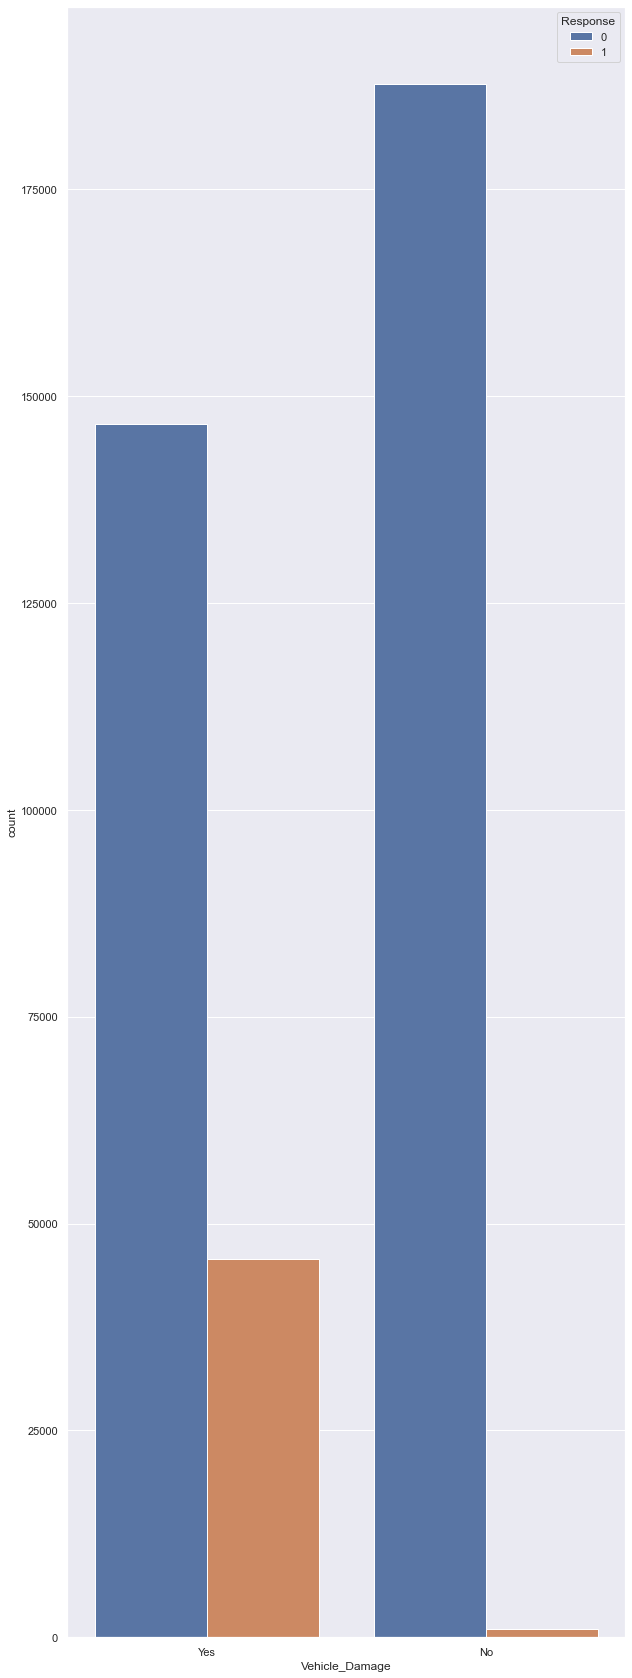

In [54]:
sns.countplot(train['Vehicle_Damage'], hue = train['Response'])

### Insights:

1. We have almost same number of customes with damaged and non_damaged vehicle.
2. Customers with Vehicle_Damage are likely to buy insurance.
3. Customers with non damaged vehicle are very unlikely to buy insurance (less than 1% of buying insurance).

## 8. Annual_Premium
Annual_Premium: The amount customer needs to pay as premium in the year

Text(0.5, 1.0, 'Age Boxplot')

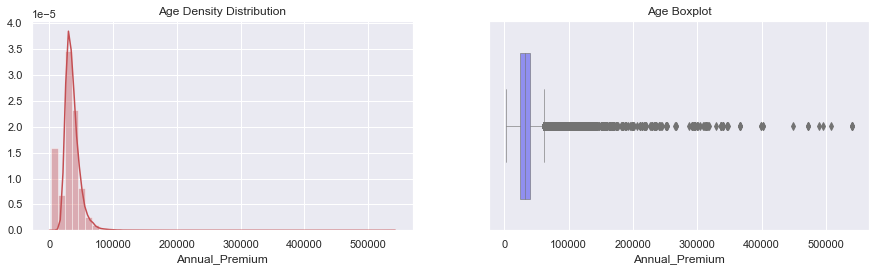

In [55]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['Annual_Premium'], color = 'r')
plt.title('Age Density Distribution')
    
plt.subplot(222)
ax2 = sns.boxplot(train['Annual_Premium'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Age Boxplot')

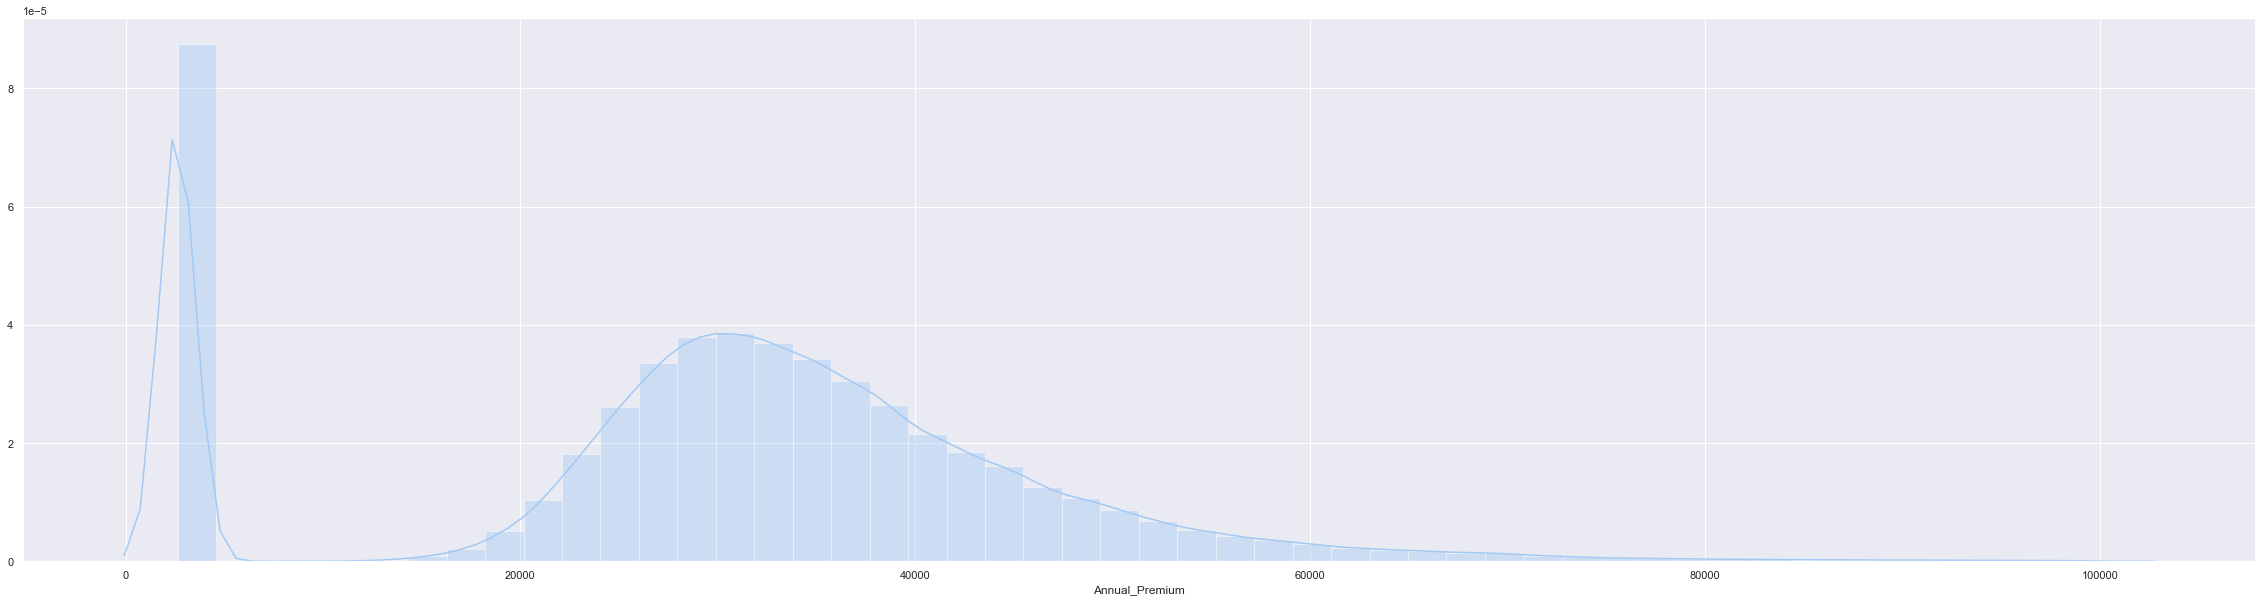

In [56]:
plt.figure(figsize=(40,10))
sns.distplot(train[ train['Annual_Premium'] < 100000]['Annual_Premium'])

In [57]:
train['Annual_Premium'].describe().round(2)

count    381109.00
mean      30564.39
std       17213.16
min        2630.00
25%       24405.00
50%       31669.00
75%       39400.00
max      540165.00
Name: Annual_Premium, dtype: float64

### Insights:

1. 'Annual Premium' data is highlt left skewed.
2. Most of the customers have "Annual_Premium' in range (0, 10000) and (20000 to 50000)

## 9. Policy_Sales_Channel

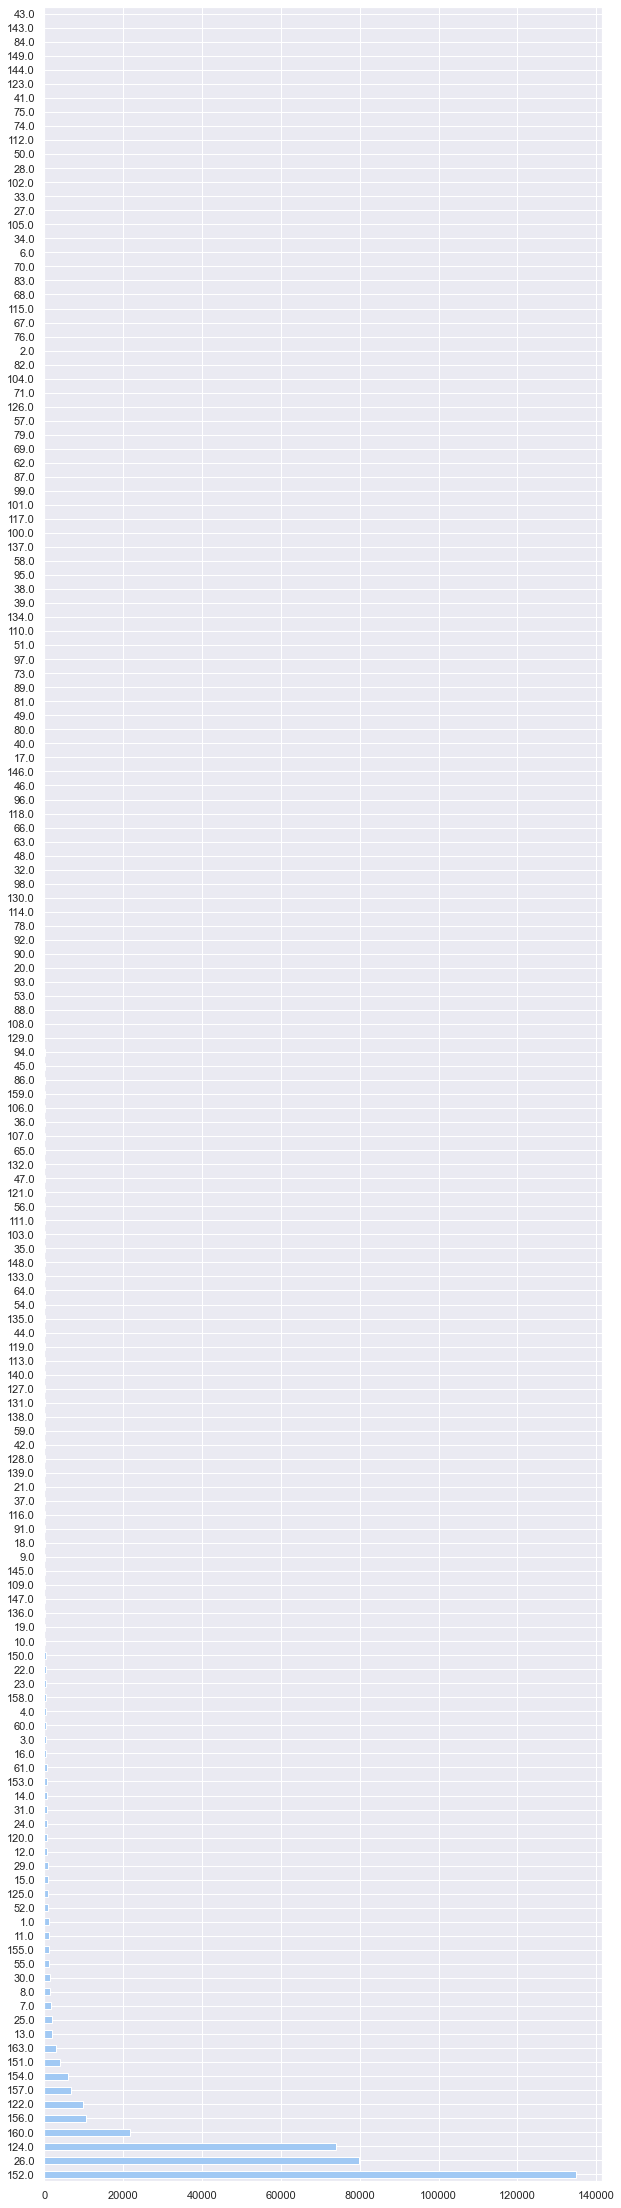

In [58]:
plt.figure(figsize=(10,40))
train['Policy_Sales_Channel'].value_counts().plot.barh()

Text(0.5, 1.0, 'Boxplot of Policy_Sales_Channel')

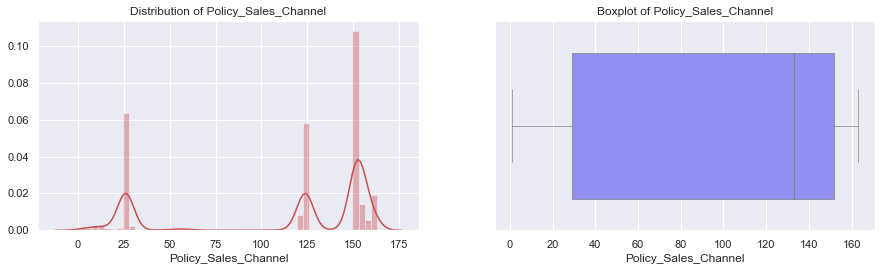

In [59]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['Policy_Sales_Channel'], color = 'r')
plt.title("Distribution of Policy_Sales_Channel")
    
plt.subplot(222)
ax2 = sns.boxplot(train['Policy_Sales_Channel'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Boxplot of Policy_Sales_Channel')

### Insights:

1. Policy_Sales_Channel no. 152 have higest number of customers.
2. Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.

## 10. Vintage

In [60]:
train['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

Text(0.5, 1.0, 'Boxplot of Vintage')

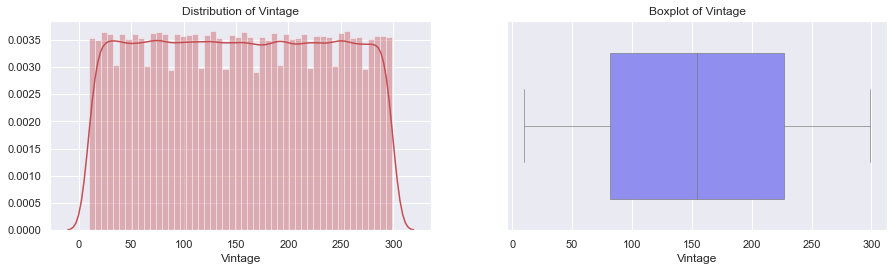

In [61]:
fig = plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace = 0.6)
sns.set_palette('pastel')

plt.subplot(221)
ax1 = sns.distplot(train['Vintage'], color = 'r')
plt.title("Distribution of Vintage")
    
plt.subplot(222)
ax2 = sns.boxplot(train['Vintage'], palette = 'cool', width=0.7, linewidth=0.6)
plt.title('Boxplot of Vintage')

### Insights:

1. Every 'Vintage' value have almost same number of customers.

# Data Preprocessing

In [62]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Groups
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,age_grp_41_to_50
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,age_grp_old
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,age_grp_41_to_50
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,age_grp_20_to_30
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,age_grp_20_to_30


In [63]:
train.dtypes

id                         int64
Gender                    object
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Age_Groups              category
dtype: object

In [64]:
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train['Vehicle_Damage']=train['Vehicle_Damage'].replace({'Yes':1,'No':0})

test['Vehicle_Age']=test['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test['Vehicle_Damage']=test['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [65]:
# Changing Datatype
train['Region_Code']=train['Region_Code'].astype(int)
test['Region_Code']=test['Region_Code'].astype(int)
train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype(int)
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype(int)

In [66]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Groups
0,1,1,44,1,28,0,2,1,40454.0,26,217,1,age_grp_41_to_50
1,2,1,76,1,3,0,1,0,33536.0,26,183,0,age_grp_old
2,3,1,47,1,28,0,2,1,38294.0,26,27,1,age_grp_41_to_50
3,4,1,21,1,11,1,0,0,28619.0,152,203,0,age_grp_20_to_30
4,5,0,29,1,41,1,0,0,27496.0,152,39,0,age_grp_20_to_30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,1,0,30170.0,26,88,0,age_grp_old
381105,381106,1,30,1,37,1,0,0,40016.0,152,131,0,age_grp_20_to_30
381106,381107,1,21,1,30,1,0,0,35118.0,160,161,0,age_grp_20_to_30
381107,381108,0,68,1,14,0,2,1,44617.0,124,74,0,age_grp_old


# Correlation

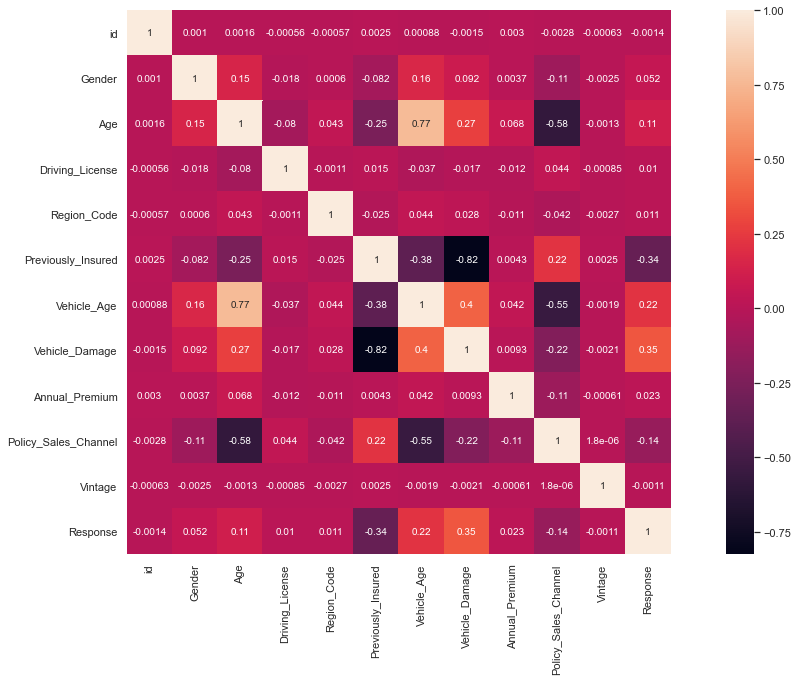

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True, square=True,annot_kws={'size': 10})

In [68]:
high_corr = train.corr()['Response'].sort_values(ascending=False)
high_corr

Response                1.000000
Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

# Splitting Data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
features=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [70]:
X=train[features]
y=train['Response']

In [71]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42,stratify=y,shuffle=True)

# Model Building and Evaluation Matrix

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, auc 

### Base Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model_LogReg = LogisticRegression()

In [75]:
model_LogReg.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred_LogReg = model_LogReg.predict(X_test)

In [77]:
acc_LogReg = accuracy_score(y_test, y_pred_LogReg)
acc_LogReg

0.8684901026469909

In [78]:
prec_LogReg = precision_score(y_test, y_pred_LogReg)
prec_LogReg

0.3397291196388262

In [79]:
rec_LogReg = recall_score(y_test, y_pred_LogReg, pos_label=1)
rec_LogReg

0.07732488439801335

In [80]:
f1_LogReg = f1_score(y_test, y_pred_LogReg)
f1_LogReg

0.1259765625

In [81]:
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83600
           1       0.34      0.08      0.13     11678

    accuracy                           0.87     95278
   macro avg       0.61      0.53      0.53     95278
weighted avg       0.82      0.87      0.83     95278



In [82]:
cm_LogReg = confusion_matrix(y_test, y_pred_LogReg, labels=[1, 0])
cm_LogReg

array([[  903, 10775],
       [ 1755, 81845]], dtype=int64)

In [113]:
903/(903+1755)

0.3397291196388262

In [90]:
df_cm_LogReg = pd.DataFrame(data=cm_LogReg, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
df_cm_LogReg

,Pred 1,Pred 0
Akt 1,903,10775
Akt 0,1755,81845


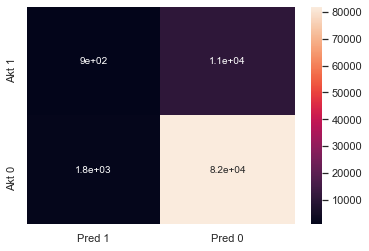

In [89]:
sns.heatmap(df_cm_LogReg, annot=True)
plt.show()
# TP FN
# FP TN
# Berhasil prediksi 903 Response, Prediksi 10775 orang Ga respon padahal respon
# Prediksi 1755 response padahal Tidak, namun berhasil prediksi 81845 orang yang tidak merespon

In [86]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


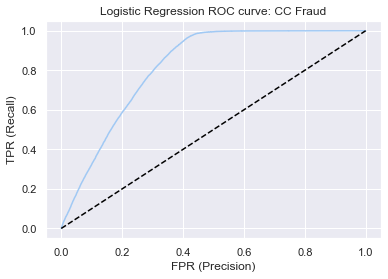

Area under curve (AUC):  0.8180245570741533


In [87]:
y_score_LogReg = model_LogReg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_LogReg)

title('Logistic Regression ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [88]:
roc_auc_score(y_test, y_score_LogReg)

0.8180245570741533

## Random Over Sampling
- **Menduplikasi Data secara Random**, kelas-target = 1 (minority), hingga jumlahnya sama dengan kelas-target = 0 (majority)
- Dataframe **fraud** akan di Oversampling, Hingga jumlahnya Sama dengan **non_fraud**

In [93]:
not_interested = train[train['Response'] == 0] ## Kelas Majority
interested = train[train['Response'] == 1] ## Kelas Minority

In [94]:
from sklearn.utils import resample

In [96]:
interested_oversample = resample(interested, ## Kelas Minority
                           replace=True,
                           n_samples = len(not_interested), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [97]:
df_OverSampled = pd.concat([not_interested, interested_oversample])

In [99]:
df_OverSampled['Response'].value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [100]:
X_train_OverSample = df_OverSampled[features]
y_train_OverSample = df_OverSampled['Response']

In [101]:
modelOS = LogisticRegression()

In [102]:
modelOS.fit(X_train_OverSample, y_train_OverSample)

LogisticRegression()

In [105]:
y_pred_LogReg_OS = modelOS.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred_LogReg_OS))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76     83600
           1       0.17      0.50      0.25     11678

    accuracy                           0.63     95278
   macro avg       0.54      0.58      0.51     95278
weighted avg       0.81      0.63      0.70     95278



In [108]:
cm_LogReg_OS = confusion_matrix(y_test, y_pred_LogReg_OS, labels=[1 , 0])
cm_LogReg_OS

array([[ 5880,  5798],
       [29053, 54547]], dtype=int64)

In [111]:
df_cm_LogReg_OS = pd.DataFrame(data=cm_LogReg_OS, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
df_cm_LogReg_OS

,Pred 1,Pred 0
Akt 1,5880,5798
Akt 0,29053,54547


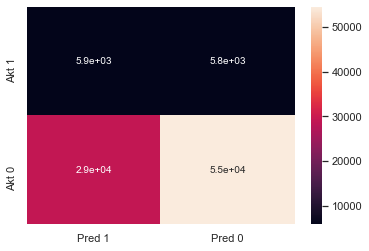

In [112]:
sns.heatmap(df_cm_LogReg_OS, annot=True)
plt.show()

In [115]:
5880/(5880+5798)

0.5035108751498544

### Base KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
model_KNN_base = KNeighborsClassifier()

In [88]:
model_KNN_base.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
y_pred_KNN_base = model_KNN_base.predict(X_test)

In [90]:
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
prec_KNN_base = precision_score(y_test, y_pred_KNN_base)
rec_KNN_base = recall_score(y_test, y_pred_KNN_base, pos_label=1)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)

In [91]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     83600
           1       0.22      0.06      0.09     11678

    accuracy                           0.86     95278
   macro avg       0.55      0.52      0.51     95278
weighted avg       0.80      0.86      0.82     95278



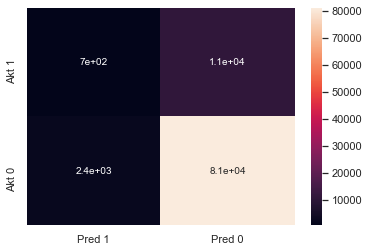

In [92]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels=[1, 0])
df_KNN_base = pd.DataFrame(data=cm_KNN_base, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_KNN_base, annot=True)
plt.show()

In [93]:
cm_KNN_base

array([[  698, 10980],
       [ 2432, 81168]], dtype=int64)

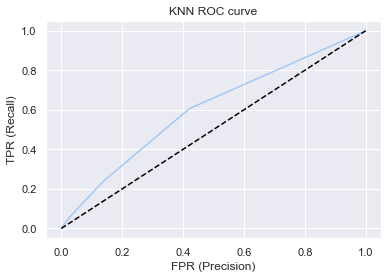

Area under curve (AUC):  0.6014976623528805


In [94]:
y_score_KNN = model_KNN_base.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_KNN)

title('KNN ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [95]:
roc_auc_score(y_test, y_score_KNN)

0.6014976623528805

### Base Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
model_RF_base = RandomForestClassifier()

In [98]:
model_RF_base.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
y_pred_RF_base = model_RF_base.predict(X_test) 
y_pred_RF_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
acc_RF_base = accuracy_score(y_test, y_pred_RF_base)
prec_RF_base = precision_score(y_test, y_pred_RF_base)
rec_RF_base = recall_score(y_test, y_pred_RF_base, pos_label=1)
f1_RF_base = f1_score(y_test, y_pred_RF_base)

In [101]:
print(classification_report(y_test, y_pred_RF_base))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83600
           1       0.38      0.12      0.19     11678

    accuracy                           0.87     95278
   macro avg       0.63      0.55      0.56     95278
weighted avg       0.83      0.87      0.84     95278



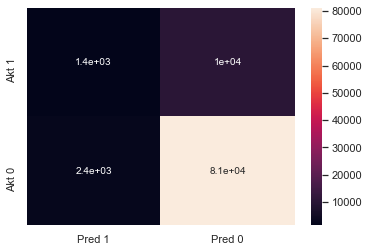

In [102]:
cm_RF_base = confusion_matrix(y_test, y_pred_RF_base, labels=[1, 0])
df_RF_base = pd.DataFrame(data=cm_RF_base, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_base, annot=True)
plt.show()

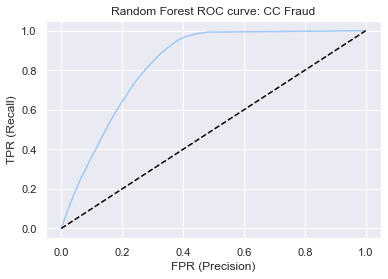

Area under curve (AUC):  0.8331269835481758


In [103]:
y_score_RF = model_RF_base.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_RF)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [104]:
roc_auc_score(y_test, y_score_RF)

0.8331269835481758

In [105]:
# HyperParameter Tuning use RandomizedSearchCV Random Forest Base

In [106]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [107]:
RF = RandomForestClassifier()

In [108]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

In [109]:
model_RF_tuned = RandomizedSearchCV(estimator = RF, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)

model_RF_tuned.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.6min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [110]:
model_RF_tuned.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_depth': 10,
 'criterion': 'entropy'}

In [111]:
model_RF_tuned.best_score_

0.8774415651528681

In [112]:
model_RF_tuned.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=7, n_estimators=300)

In [113]:
y_pred_RF_tuned = model_RF_tuned.predict(X_test)

In [114]:
acc_RF_tuned = accuracy_score(y_test, y_pred_RF_tuned)
prec_RF_tuned = precision_score(y_test, y_pred_RF_tuned)
rec_RF_tuned = recall_score(y_test, y_pred_RF_tuned, pos_label=1)
f1_RF_tuned = f1_score(y_test, y_pred_RF_tuned)

In [115]:
print (classification_report(y_test, y_pred_RF_tuned))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83600
           1       0.00      0.00      0.00     11678

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



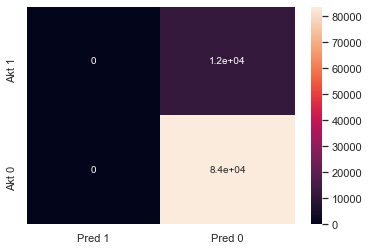

In [116]:
cm_RF_tuned = confusion_matrix(y_test, y_pred_RF_tuned, labels=[1, 0])
df_RF_tuned = pd.DataFrame(data=cm_RF_tuned, columns=['Pred 1', 'Pred 0'], index = ['Akt 1', 'Akt 0'])
sns.heatmap(df_RF_tuned, annot=True)
plt.show()

In [117]:
cm_RF_tuned

array([[    0, 11678],
       [    0, 83600]], dtype=int64)

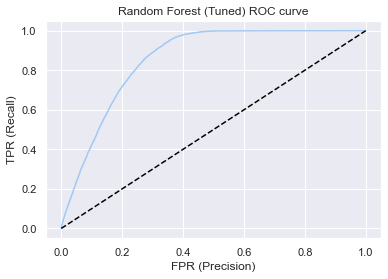

Area under curve (AUC):  0.8553095472122364


In [118]:
y_score_RF_tuned = model_RF_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score_RF_tuned)

title('Random Forest (Tuned) ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [119]:
roc_auc_score(y_test, y_score_RF_tuned)

0.8553095472122364

In [120]:
data = {
    "LogReg" : [acc_LogReg, prec_LogReg, rec_LogReg, f1_LogReg],
    "KNN" : [acc_KNN_base, prec_KNN_base, rec_KNN_base, f1_KNN_base],
    "RandomForest (Base)" : [acc_RF_base, prec_RF_base, rec_RF_base, f1_RF_base],
    "RandomForest (Tuned)" : [acc_RF_tuned, prec_RF_tuned, rec_RF_tuned, f1_RF_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg,KNN,RandomForest (Base),RandomForest (Tuned)
Accuracy,0.868490,0.859233,0.867357,0.877432
Precision,0.339729,0.223003,0.375260,0.000000
Recall,0.077325,0.059771,0.123651,0.000000
F1 Score,0.125977,0.094273,0.186011,0.000000


# CONCLUSION
because the data is imbalanced, we cant use the accuracy score because it could be misleading. The best model for this data is RandomForest with tuning because it has the highest ROC_AUC_SCORE it means the model is the best in separating values on the target column